## Linear SVM

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## As given from previous homeworks in COGS 118A 
def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## covtype.data

In [3]:
COV_TYPE = np.loadtxt('./covtype.data', delimiter=',')
COV_TYPE_X = COV_TYPE[:,:53]
COV_TYPE_Y = COV_TYPE[:,54]
COV_TYPE_X, null_1, COV_TYPE_Y, null_2 = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=10000/581012)

In [4]:
for i in range(len(COV_TYPE_Y)):
    if COV_TYPE_Y[i] == 2: COV_TYPE_Y[i] = 1
    else: COV_TYPE_Y[i] = 0

In [5]:
# 20/80
cov_xtrain, cov_xtest, cov_ytrain, cov_ytest = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=0.20)
sclf = LinearSVC()
C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
params_C = {'C': C_list}

In [7]:
clf_1 = GridSearchCV(sclf, params_C, cv=5)
clf_1.fit(cov_xtrain, cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

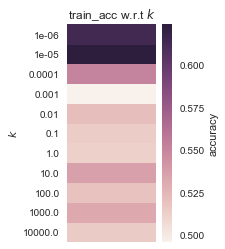

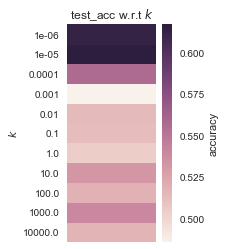

In [9]:
draw_heatmap_knn(np.array(clf_1.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(clf_1.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [12]:
sclf = LinearSVC(C=clf_1.best_params_['C'])
sclf.fit(cov_xtrain, cov_ytrain)
print('Linear SVM accuracy on covtype.data 20/80: ', sclf.score(cov_xtest, cov_ytest))
print('Best C: ', clf_1.best_params_['C'])

Linear SVM accuracy on covtype.data 20/80:  0.62025
Best C:  1e-05


In [13]:
# 50/50
cov_xtrain, cov_xtest, cov_ytrain, cov_ytest = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=0.50)
sclf_2 = LinearSVC()

In [14]:
clf_2 = GridSearchCV(sclf, params_C, cv=5)
clf_2.fit(cov_xtrain, cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1e-05, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

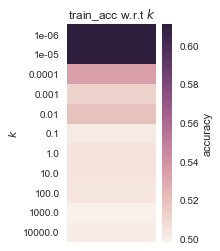

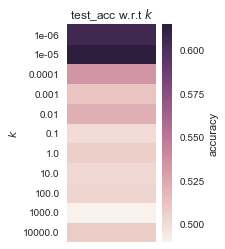

In [15]:
draw_heatmap_knn(np.array(clf_2.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(clf_2.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [16]:
sclf_2 = LinearSVC(C=clf_2.best_params_['C'])
sclf_2.fit(cov_xtrain, cov_ytrain)
print('Linear SVM accuracy on covtype.data 50/50: ', sclf_2.score(cov_xtest, cov_ytest))
print('Best C: ', clf_2.best_params_['C'])

Linear SVM accuracy on covtype.data 50/50:  0.623
Best C:  1e-05


In [17]:
# 80/20
cov_xtrain, cov_xtest, cov_ytrain, cov_ytest = train_test_split(COV_TYPE_X, COV_TYPE_Y, train_size=0.80)
sclf_3 = LinearSVC()

In [18]:
clf_3 = GridSearchCV(sclf_3, params_C, cv=5)
clf_3.fit(cov_xtrain, cov_ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

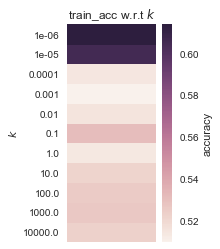

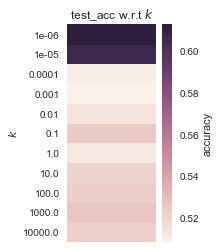

In [19]:
draw_heatmap_knn(np.array(clf_3.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(clf_3.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [20]:
sclf_3 = LinearSVC(C=clf_3.best_params_['C'])
sclf_3.fit(cov_xtrain, cov_ytrain)
print('Linear SVM accuracy on covtype.data 80/20: ', sclf_3.score(cov_xtest, cov_ytest))
print('Best C: ', clf_3.best_params_['C'])

Linear SVM accuracy on covtype.data 80/20:  0.618
Best C:  1e-06


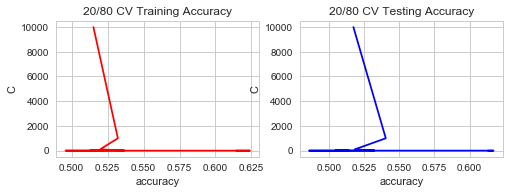

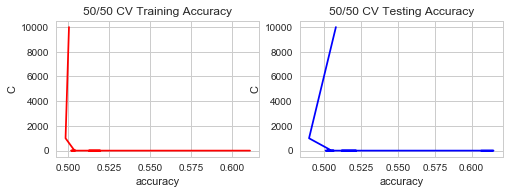

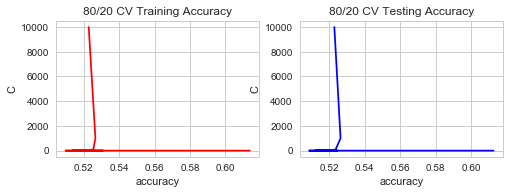

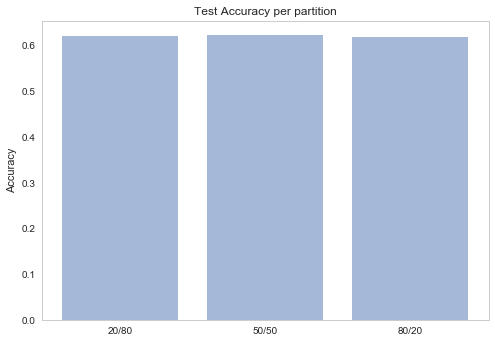

In [44]:
partition_20_80_cross_val_train_acc = clf_1.cv_results_['mean_train_score']
partition_20_80_cross_val_test_acc = clf_1.cv_results_['mean_test_score']

partition_50_50_cross_val_train_acc = clf_2.cv_results_['mean_train_score']
partition_50_50_cross_val_test_acc = clf_2.cv_results_['mean_test_score']

partition_80_20_cross_val_train_acc = clf_3.cv_results_['mean_train_score']
partition_80_20_cross_val_test_acc = clf_3.cv_results_['mean_test_score']

plt.figure(1)
plt.subplot(221)
plt.title('20/80 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_20_80_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('20/80 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_20_80_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(2)
plt.subplot(221)
plt.title('50/50 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_50_50_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('50/50 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_50_50_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(3)
plt.subplot(221)
plt.title('80/20 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_80_20_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('80/20 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_80_20_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(4)
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.62025, 0.623, 0.618]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()

## ADULTS.data

In [21]:
adults = pd.read_csv('./adult.data.txt')
adults = pd.get_dummies(adults, prefix=['workclass', 'education', 'marital_status', 
'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'])
adults = adults.as_matrix()
adults_x = adults[:,:108]
adults_y = adults[:,109]

In [22]:
adults_x, null_1, adults_y, null_2 = train_test_split(adults_x, adults_y, train_size=10000/32560)

In [23]:
# 20/80
adults_train_x, adults_test_x, adults_train_y, adults_test_y = train_test_split(adults_x, adults_y, train_size=0.20)
aclf = LinearSVC()
adults_clf_1 = GridSearchCV(aclf, params_C, cv=5)
adults_clf_1.fit(adults_train_x, adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

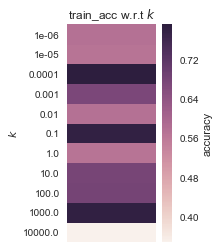

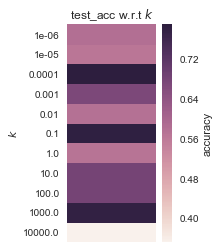

In [24]:
draw_heatmap_knn(np.array(adults_clf_1.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(adults_clf_1.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [26]:
aclf_final_1 = LinearSVC(C=adults_clf_1.best_params_['C'])
aclf_final_1.fit(adults_train_x, adults_train_y)
print('Linear SVM accuracy on ADULTS.data 20/80: ', aclf_final_1.score(adults_test_x, adults_test_y))
print('Best C: ', adults_clf_1.best_params_['C'])

Linear SVM accuracy on ADULTS.data 20/80:  0.792625
Best C:  0.0001


In [48]:
# 50/50
adults_train_x, adults_test_x, adults_train_y, adults_test_y = train_test_split(adults_x, adults_y, train_size=0.50)
aclf = LinearSVC()
adults_clf_2 = GridSearchCV(aclf, params_C, cv=5)
adults_clf_2.fit(adults_train_x, adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

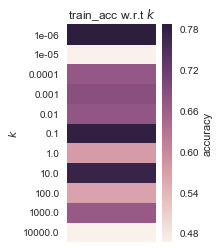

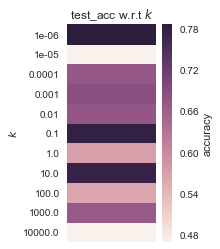

In [49]:
draw_heatmap_knn(np.array(adults_clf_2.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(adults_clf_2.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [50]:
aclf_final_2 = LinearSVC(C=adults_clf_2.best_params_['C'])
aclf_final_2.fit(adults_train_x, adults_train_y)
print('Linear SVM accuracy on ADULTS.data 50/50: ', aclf_final_2.score(adults_test_x, adults_test_y))
print('Best C: ', adults_clf_2.best_params_['C'])

Linear SVM accuracy on ADULTS.data 50/50:  0.8124
Best C:  1e-06


In [57]:
# 80/20
adults_train_x, adults_test_x, adults_train_y, adults_test_y = train_test_split(adults_x, adults_y, train_size=0.80)
aclf = LinearSVC()
adults_clf_3 = GridSearchCV(aclf, params_C, cv=5)
adults_clf_3.fit(adults_train_x, adults_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

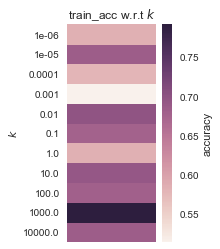

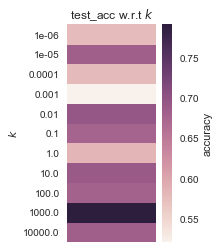

In [58]:
draw_heatmap_knn(np.array(adults_clf_3.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(adults_clf_3.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [59]:
aclf_final_3 = LinearSVC(C=adults_clf_3.best_params_['C'])
aclf_final_3.fit(adults_train_x, adults_train_y)
print('Linear SVM accuracy on ADULTS.data 80/20: ', aclf_final_3.score(adults_test_x, adults_test_y))
print('Best C: ', adults_clf_3.best_params_['C'])

Linear SVM accuracy on ADULTS.data 80/20:  0.772
Best C:  1000.0


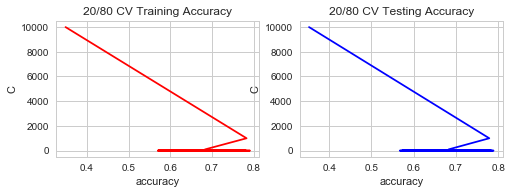

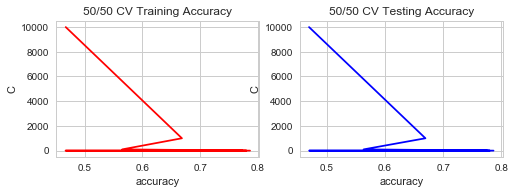

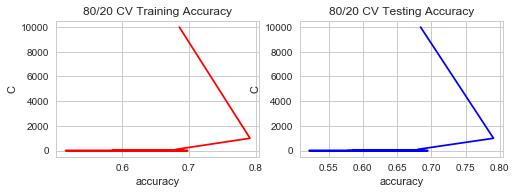

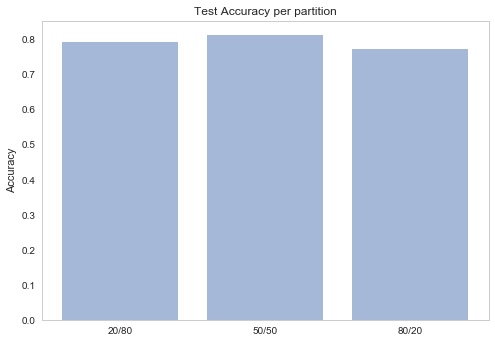

In [60]:
partition_20_80_cross_val_train_acc = adults_clf_1.cv_results_['mean_train_score']
partition_20_80_cross_val_test_acc = adults_clf_1.cv_results_['mean_test_score']

partition_50_50_cross_val_train_acc = adults_clf_2.cv_results_['mean_train_score']
partition_50_50_cross_val_test_acc = adults_clf_2.cv_results_['mean_test_score']

partition_80_20_cross_val_train_acc = adults_clf_3.cv_results_['mean_train_score']
partition_80_20_cross_val_test_acc = adults_clf_3.cv_results_['mean_test_score']

plt.figure(1)
plt.subplot(221)
plt.title('20/80 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_20_80_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('20/80 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_20_80_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(2)
plt.subplot(221)
plt.title('50/50 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_50_50_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('50/50 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_50_50_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(3)
plt.subplot(221)
plt.title('80/20 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_80_20_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('80/20 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_80_20_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(4)
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.793, 0.8124, 0.772]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()

# letter-recognition.data (Problem 2)

In [61]:
letters = pd.read_csv('./letter-recognition.data')
letters_samples = letters.as_matrix()[:,1:17]
letters_p2 = letters.as_matrix()[:,0]

letters_p2_x, null_1, letters_p2_y, null_2 = train_test_split(letters_samples,
                                                              letters_p2,
                                                              train_size=10000/19999)

# Treat letters_p2 as A-M positive, remaining negative
for i in range(len(letters_p2_y)):
    if letters_p2_y[i] == "A": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "B": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "C": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "D": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "E": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "F": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "G": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "H": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "I": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "J": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "K": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "L": letters_p2_y[i] = 1
    elif letters_p2_y[i] == "M": letters_p2_y[i] = 1
    else:
        letters_p2_y[i] = 0
letters_p2_y = letters_p2_y.astype('int')

In [62]:
# 20/80
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(letters_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.20)
letter_clf_1 = LinearSVC()
letter_g_clf_1 = GridSearchCV(letter_clf_1, params_C, cv=5)
letter_g_clf_1.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

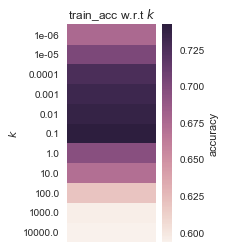

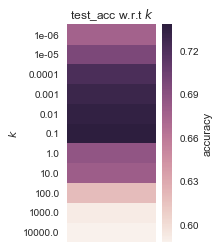

In [63]:
draw_heatmap_knn(np.array(letter_g_clf_1.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(letter_g_clf_1.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [64]:
letter_clf_trained = LinearSVC(C=letter_g_clf_1.best_params_['C'])
letter_clf_trained.fit(letters_train_x, letters_train_y)
print('Linear SVM accuracy on letter-recognition.data (problem 2): ', letter_clf_trained.score(
        letters_test_x, letters_test_y))
print('Best parameter: ', letter_g_clf_1.best_params_['C'])

Linear SVM accuracy on letter-recognition.data (problem 2):  0.72175
Best parameter:  0.1


In [65]:
# 50/50
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(letters_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.50)
letter_clf_2 = LinearSVC()
letter_g_clf_2 = GridSearchCV(letter_clf_2, params_C, cv=5)
letter_g_clf_2.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

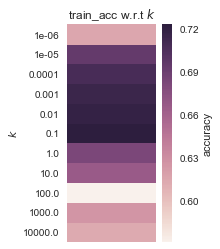

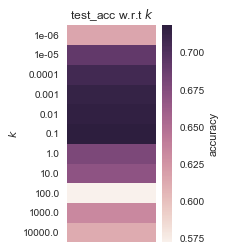

In [66]:
draw_heatmap_knn(np.array(letter_g_clf_2.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(letter_g_clf_2.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [67]:
letter_clf_trained = LinearSVC(C=letter_g_clf_2.best_params_['C'])
letter_clf_trained.fit(letters_train_x, letters_train_y)
print('Linear SVM accuracy on letter-recognition.data (problem 2): ', letter_clf_trained.score(
        letters_test_x, letters_test_y))
print('Best parameter: ', letter_g_clf_2.best_params_['C'])

Linear SVM accuracy on letter-recognition.data (problem 2):  0.713
Best parameter:  0.1


In [68]:
# 80/20
letters_train_x, letters_test_x, letters_train_y, letters_test_y = train_test_split(letters_p2_x, 
                                                                                    letters_p2_y,
                                                                                    train_size=0.80)
letter_clf_3 = LinearSVC()
letter_g_clf_3 = GridSearchCV(letter_clf_3, params_C, cv=5)
letter_g_clf_3.fit(letters_train_x, letters_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

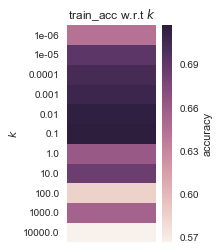

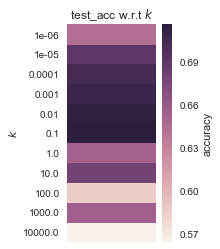

In [69]:
draw_heatmap_knn(np.array(letter_g_clf_3.cv_results_['mean_train_score']).reshape(-1,1), 'train_acc', params_C['C'])
draw_heatmap_knn(np.array(letter_g_clf_3.cv_results_['mean_test_score']).reshape(-1,1), 'test_acc', params_C['C'])

In [70]:
letter_clf_trained = LinearSVC(C=letter_g_clf_3.best_params_['C'])
letter_clf_trained.fit(letters_train_x, letters_train_y)
print('Linear SVM accuracy on letter-recognition.data (problem 2): ', letter_clf_trained.score(
        letters_test_x, letters_test_y))
print('Best parameter: ', letter_g_clf_3.best_params_['C'])

Linear SVM accuracy on letter-recognition.data (problem 2):  0.732
Best parameter:  0.1


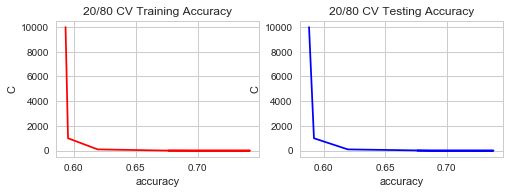

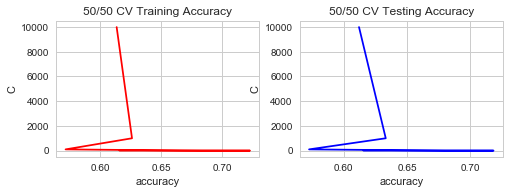

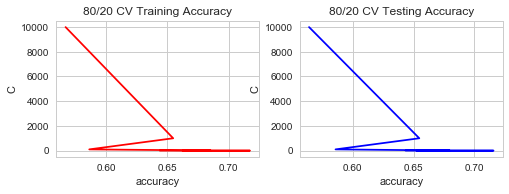

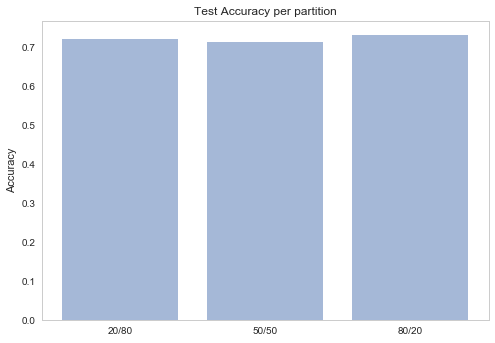

In [73]:
partition_20_80_cross_val_train_acc = letter_g_clf_1.cv_results_['mean_train_score']
partition_20_80_cross_val_test_acc = letter_g_clf_1.cv_results_['mean_test_score']

partition_50_50_cross_val_train_acc = letter_g_clf_2.cv_results_['mean_train_score']
partition_50_50_cross_val_test_acc = letter_g_clf_2.cv_results_['mean_test_score']

partition_80_20_cross_val_train_acc = letter_g_clf_3.cv_results_['mean_train_score']
partition_80_20_cross_val_test_acc = letter_g_clf_3.cv_results_['mean_test_score']

plt.figure(1)
plt.subplot(221)
plt.title('20/80 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_20_80_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('20/80 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_20_80_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(2)
plt.subplot(221)
plt.title('50/50 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_50_50_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('50/50 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_50_50_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(3)
plt.subplot(221)
plt.title('80/20 CV Training Accuracy')
plt.xlabel('accuracy')
plt.ylabel('C')
plt.grid(True)
plt.plot(partition_80_20_cross_val_train_acc, C_list, 'r')
plt.subplot(222)
plt.title('80/20 CV Testing Accuracy')
plt.xlabel('accuracy')
plt.grid(True)
plt.ylabel('C')
plt.plot(partition_80_20_cross_val_test_acc, C_list, 'b')
plt.show()

plt.figure(4)
partitions = ('20/80', '50/50', '80/20')
y_tic = np.arange(len(partitions))
performance_by_partition = [0.72175, 0.713, 0.732]
plt.bar(y_tic, performance_by_partition, align='center', alpha=0.5)
plt.xticks(y_tic, partitions)
plt.ylabel('Accuracy')
plt.title('Test Accuracy per partition')
plt.show()